In [1]:
import numpy as np
from scipy.stats import binom, poisson, geom, hypergeom
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)
pd.options.display.float_format = '{:.4f}'.format

def mod(X, probabilities):
    mx = np.max(probabilities)
    ind = np.where(np.isclose(probabilities, mx))[0]
    return X[ind]

def pict(X, probabilities, name):
    plt.figure(figsize=(8, 4))
    plt.bar(X, probabilities, align='center', alpha=0.7)
    plt.plot(X, probabilities, marker='o', linestyle='--')
    plt.title(f"{name} - многоугольник распределения")
    plt.xlabel("x")
    plt.ylabel("P(X)")
    plt.xticks(X)
    plt.grid(axis='y', linestyle=':', linewidth=0.7)
    plt.tight_layout()
    plt.show()

#  Биномиальное распределение
Вероятность того, что клиент интернет-магазина совершит покупку, зайдя на сайт, равна 0.1. За день сайт посещают 10 независимых клиентов. Найти математическое ожидание, дисперсию, среднеквадратичное отклонение и моду данной случайной величины. Построить многоугольник распределения.

,0,1,2,3,4,5,6,7,8,9,10
p,0.3487,0.3874,0.1937,0.0574,0.0112,0.0015,0.0001,0.0000,0.0000,0.0000,0.0000


Мат. ожидание = 1.0000
Дисперсия = 0.9000
Среднее квадратическое отклонение = 0.9487
Мода = [1]


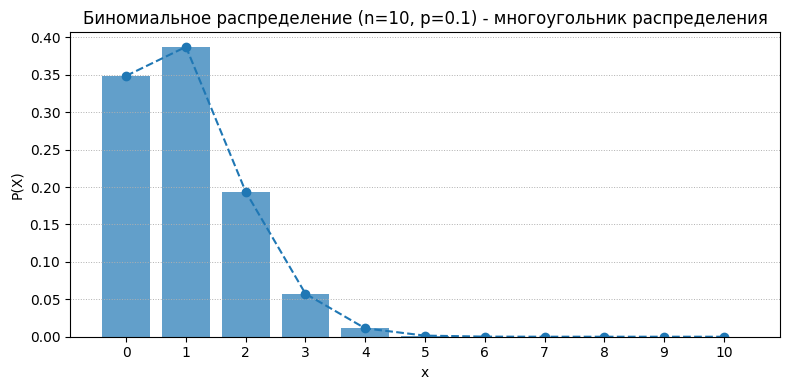

None

In [2]:
n, p = 10, 0.1
X = np.arange(0, n + 1)

binom_dist = binom(n, p)
probabilities = binom_dist.pmf(X)
df = pd.DataFrame(data=probabilities.reshape(1, -1), columns=X, index=['p'])

display(df)

print(f'Мат. ожидание = {binom_dist.mean():.4f}')
print(f'Дисперсия = {binom_dist.var():.4f}')
print(f'Среднее квадратическое отклонение = {binom_dist.std():.4f}')
print(f'Мода = {mod(X, probabilities)}')
display(pict(X, probabilities, 'Биномиальное распределение (n=10, p=0.1)'))

# Распределение Пуассона
В колл-центр крупной компании в среднем поступает 4 звонка за 5 минут. Случайная величина X – число звонков, поступивших за 5 минут. Найти математическое ожидание, дисперсию, среднеквадратичное отклонение и моду данной случайной величины. Построить многоугольник распределения.

,0,1,2,3,4,5,6
p,0.0183,0.0733,0.1465,0.1954,0.1954,0.1563,0.1042


Мат. ожидание = 4.0000
Дисперсия = 4.0000
Среднее квадратическое отклонение = 2.0000
Мода = [3 4]


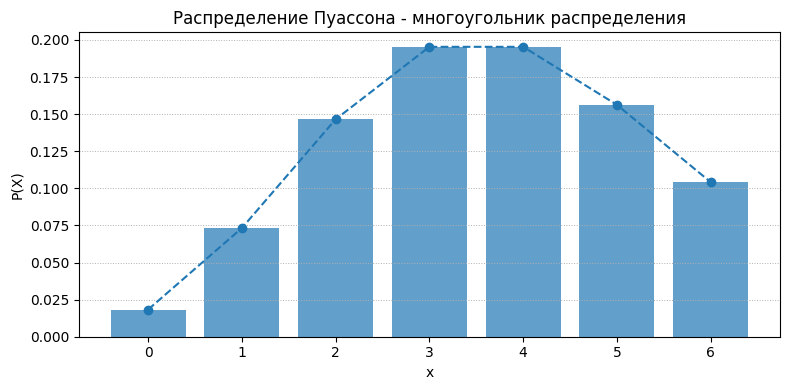

None

In [3]:
lmb = 4
X = np.arange(0, 7)

poisson_dist = poisson(lmb)
probabilities = poisson_dist.pmf(X)
df = pd.DataFrame(data=probabilities.reshape(1, -1), columns=X, index=['p'] )

display(df)

print(f'Мат. ожидание = {poisson_dist.mean():.4f}')
print(f'Дисперсия = {poisson_dist.var():.4f}')
print(f'Среднее квадратическое отклонение = {poisson_dist.std():.4f}')
print(f'Мода = {mod(X, probabilities)}')

display(pict(X, probabilities, 'Распределение Пуассона'))

# Геометрическое распределение
Баскетболист выполняет броски по кольцу. Вероятность попадания при одном броске равна 0.7. Броски производятся до первого попадания. Найти математическое ожидание, дисперсию, среднеквадратичное отклонение и моду данной случайной величины. Построить многоугольник распределения.

,1,2,3,4,5
p,0.7000,0.2100,0.0630,0.0189,0.0057


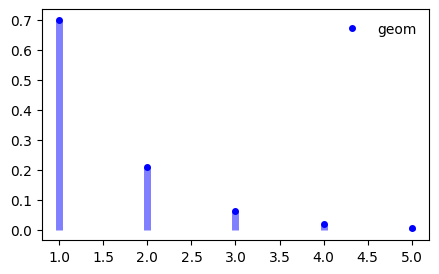

Мат. ожидание = 1.4286
Дисперсия = 0.6122
Среднее квадратическое отклонение = 0.7825
Мода = [1]


In [4]:
p = 0.7

X = np.arange(1, 6)
geom_dist = geom(p)
probabilities = geom_dist.pmf(X)

df = pd.DataFrame(data=probabilities.reshape(1, -1), columns=X, index=['p'])

display(df)

plt.figure(figsize=(5,3))
plt.plot(X, probabilities, 'bo', ms=4, label='geom')
plt.vlines(X, 0, probabilities, colors='b', lw=5, alpha=0.5)

plt.legend(loc='best', frameon=False)
plt.show()

print(f'Мат. ожидание = {geom_dist.mean():.4f}')
print(f'Дисперсия = {geom_dist.var():.4f}')
print(f'Среднее квадратическое отклонение = {geom_dist.std():.4f}')
print(f'Мода = {mod(X, probabilities)}')

# Гипергеометрическое распределение
В ящике 10 деталей, из которых 3 бракованные. Контролёр случайным образом отбирает 4 детали для проверки. Найти математическое ожидание, дисперсию, среднеквадратичное отклонение и моду данной случайной величины. Построить многоугольник распределения.

,0,1,2,3,4
p,0.1667,0.5000,0.3000,0.0333,0.0000


Мат. ожидание = 1.2000
Дисперсия = 0.5600
Среднее квадратичное отклонение = 0.7483
Мода = [1]


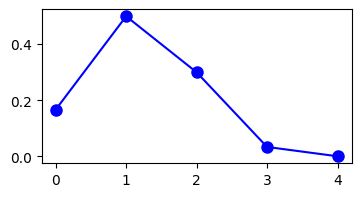

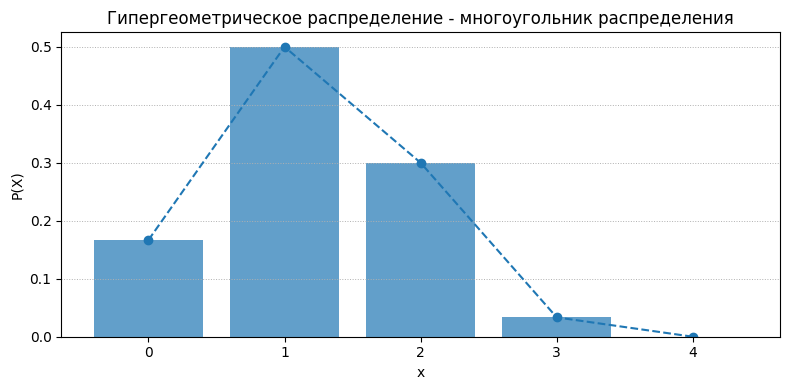

None

In [7]:
N, M, n = 10, 3, 4

X = np.arange(0, n + 1)
hyper_dist = hypergeom(M=N, N=n, n=M)
probabilities = hyper_dist.pmf(X)

df = pd.DataFrame(data=probabilities.reshape(1, -1), columns=X, index=['p'])

display(df)

print(f'Мат. ожидание = {hyper_dist.mean():.4f}')
print(f'Дисперсия = {hyper_dist.var():.4f}')
print(f'Среднее квадратичное отклонение = {hyper_dist.std():.4f}')
print(f'Мода = {mod(X, probabilities)}')

plt.figure(figsize=(4,2))
plt.plot(X, probabilities, '-bo', ms=8, label='Гипергеометрическое распределение')
plt.show()

display(pict(X, probabilities, 'Гипергеометрическое распределение'))